In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
# plt.rcParams['figure.figsize'] = (20.0, 10.0)

# Reading data
data = pd.read_csv('headbrain.csv')
print(data.shape)
data.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236 entries, 1 to 236
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Gender               236 non-null    int64
 1   Age Range            236 non-null    int64
 2   Head Size(cm^3)      236 non-null    int64
 3   Brain Weight(grams)  236 non-null    int64
dtypes: int64(4)
memory usage: 9.2 KB


In [9]:
data.isnull().sum()

Gender                 0
Age Range              0
Head Size(cm^3)        0
Brain Weight(grams)    0
dtype: int64

In [2]:
from sklearn.model_selection import train_test_split

#Collecting X and Y
data = data.drop([0], axis=0)
X = data['Head Size(cm^3)'].values
Y = data['Brain Weight(grams)'].values

# Test
x_train, x_test, y_train, y_test = train_test_split( X, Y, test_size=0.50, random_state=42, shuffle=True)

In [3]:
# Mean X and Y

mean_x = np.mean(x_train)
mean_y = np.mean(y_train)

# Total number of values
length_x_train = len(x_train)

# Using the formula to calculate b1 and b0
numer = 0
demon = 0
for i in range(length_x_train):
    numer += (X[i] -mean_x) * (Y[i] - mean_y)
    demon += (X[i] - mean_x) ** 2
m = numer / demon  # m
c = mean_y - (m * mean_x)  # c 
# y = mx + c
# Print Cofficients
print(m, c)

0.2656258648565125 311.9474594713247


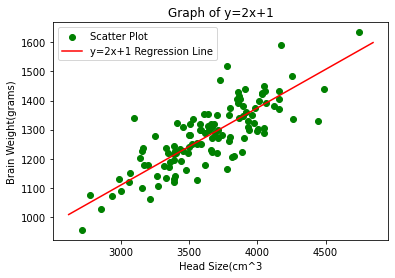

In [4]:
# Plotting the points
plt.scatter(x_train, y_train, color = 'g', label = 'Scatter Plot')
plt.xlabel('Head Size(cm^3')
plt.ylabel('Brain Weight(grams)')

x = np.linspace( np.amin(x_train)-100, np.amax(x_train)+100, 1000 )
y = m*x + c

# Ploting Line
plt.plot(x, y, '-r', label='y=2x+1 Regression Line')
plt.title('Graph of y=2x+1')
plt.legend()
plt.show()

In [5]:
import math
d =0
n = 0
for i in range(length_x_train):
    y_p = m*X[i] + c 
    n += (y_p - mean_y) **2
    d += (Y[i] - mean_y)**2


R = math.sqrt(1- n/d)
print(R)

0.6387289988758657


In [6]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

model = linear_model.LinearRegression()
model.fit([x_train], [y_train])
y_pred = model.predict([x_test])
y_pred = y_pred.reshape(-1) 

Coefficients: 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Mean squared error:  27183.415254237287
Coefficient of determination:  -0.7668225849147419


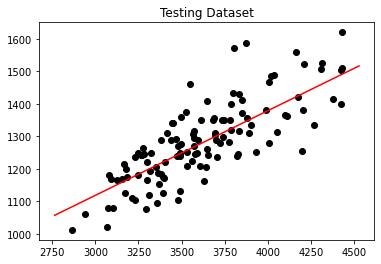

In [7]:
from sklearn.metrics import r2_score

# The coefficients
print("Coefficients: \n", model.coef_)
# The mean squared error
print("Mean squared error: " , mean_squared_error(y_test,y_pred) )
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: " , r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(x_test, y_test, color="black")
# plt.plot(x_test, y_pred, color="blue")
# plt.plot(y_test, color="black")
# plt.plot(y_pred, color="blue", ls="--")


mean_x_test = np.mean(x_test)
mean_y_pred = np.mean(y_pred)

# Total number of values
length_x_test = len(x_test)

# Using the formula to calculate b1 and b0
numer = 0
demon = 0
for i in range(length_x_test):
    numer += (X[i] - mean_x_test) * (Y[i] - mean_y_pred)
    demon += (X[i] - mean_x_test) ** 2
m = numer / demon  # m
c = mean_y_pred - (m * mean_x_test)  # c 
# y = mx + c
x = np.linspace( np.amin(x_test)-100, np.amax(x_test)+100, 1000 )
y = m*x + c

# Ploting Line
plt.plot(x, y, '-r', label='y=2x+1 Regression Line')
plt.title('Testing Dataset')

# plt.xticks(())
# plt.yticks(())

plt.show()